In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("apple_products.csv")
print(df.tail())

                       Product Name  \
57   APPLE iPhone SE (Black, 64 GB)   
58  APPLE iPhone 11 (Purple, 64 GB)   
59   APPLE iPhone 11 (White, 64 GB)   
60   APPLE iPhone 11 (Black, 64 GB)   
61     APPLE iPhone 11 (Red, 64 GB)   

                                          Product URL  Brand  Sale Price  \
57  https://www.flipkart.com/apple-iphone-se-black...  Apple       29999   
58  https://www.flipkart.com/apple-iphone-11-purpl...  Apple       46999   
59  https://www.flipkart.com/apple-iphone-11-white...  Apple       46999   
60  https://www.flipkart.com/apple-iphone-11-black...  Apple       46999   
61  https://www.flipkart.com/apple-iphone-11-red-6...  Apple       46999   

      Mrp  Discount Percentage  Number Of Ratings  Number Of Reviews  \
57  39900                   24              95909               8161   
58  54900                   14              43470               3331   
59  54900                   14              43470               3331   
60  54900           

Before moving forward, let’s have a quick look at whether this dataset contains any null values or not:

In [4]:
print(df.isnull().sum())

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64


The dataset doesn’t have any null values. Now, let’s have a look at the descriptive statistics of the data:

In [5]:
print(df.describe())

          Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      62.000000      62.000000            62.000000          62.000000   
mean    80073.887097   88058.064516             9.951613       22420.403226   
std     34310.446132   34728.825597             7.608079       33768.589550   
min     29999.000000   39900.000000             0.000000         542.000000   
25%     49900.000000   54900.000000             6.000000         740.000000   
50%     75900.000000   79900.000000            10.000000        2101.000000   
75%    117100.000000  120950.000000            14.000000       43470.000000   
max    140900.000000  149900.000000            29.000000       95909.000000   

       Number Of Reviews  Star Rating  
count          62.000000    62.000000  
mean         1861.677419     4.575806  
std          2855.883830     0.059190  
min            42.000000     4.500000  
25%            64.000000     4.500000  
50%           180.000000     4.600000  
75%     

Now I will create a new dataframe by storing all the data about the top 10 highest-rated iPhones in India on Flipkart. It will help in understanding what kind of iPhones are liked the most in India:


In [6]:
highest_rated = df.sort_values(by=["Star Rating"], 
                                 ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated['Product Name'])

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object


Now let’s have a look at the number of ratings of the highest-rated iPhones on Flipkart:




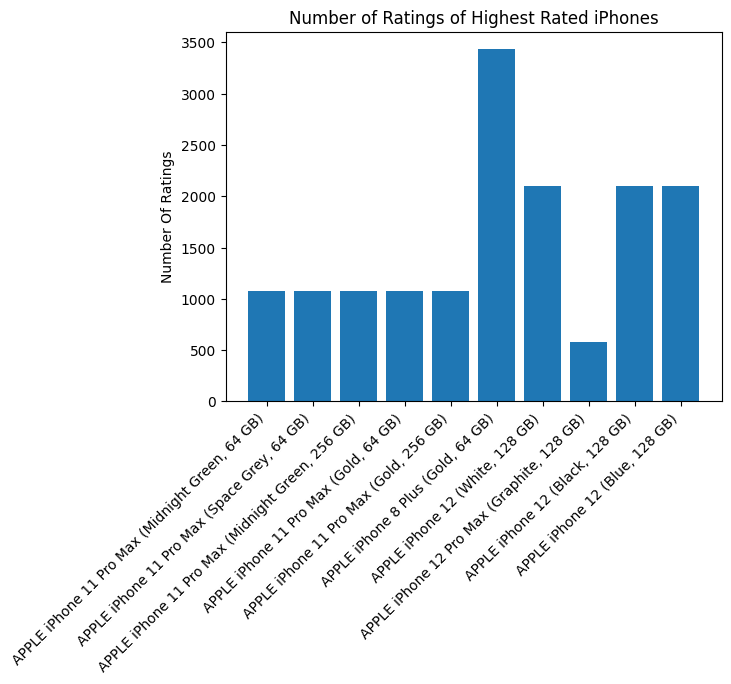

In [10]:
ax = plt.subplot()
ax.bar(highest_rated['Product Name'],highest_rated['Number Of Ratings'])
plt.xticks(rotation=45,ha='right')
ax.set_ylabel('Number Of Ratings')
ax.set_title('Number of Ratings of Highest Rated iPhones')
plt.show()


            

According to the above bar graph, APPLE iPhone 8 Plus (Gold, 64 GB) has the most ratings on Flipkart. Now let’s have a look at the number of reviews of the highest-rated iPhones on Flipkart:

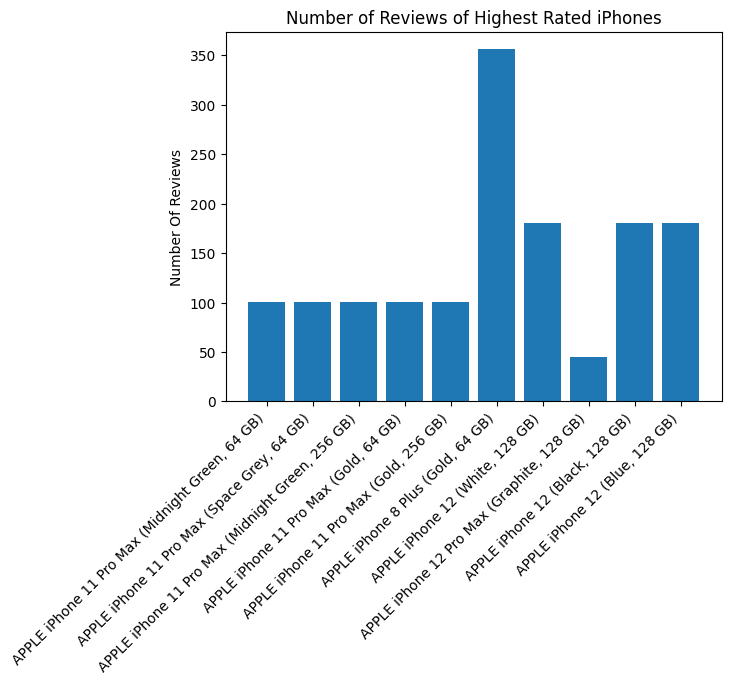

In [11]:
ax = plt.subplot()
ax.bar(highest_rated['Product Name'],highest_rated['Number Of Reviews'])
plt.xticks(rotation=45,ha='right')
ax.set_ylabel('Number Of Reviews')
ax.set_title('Number of Reviews of Highest Rated iPhones')
plt.show()

APPLE iPhone 8 Plus (Gold, 64 GB) is also leading in the highest number of reviews on Flipkart among the highest-rated iPhones in India. Now let’s have a look at the relationship between the sale price of iPhones and their ratings on Flipkart:



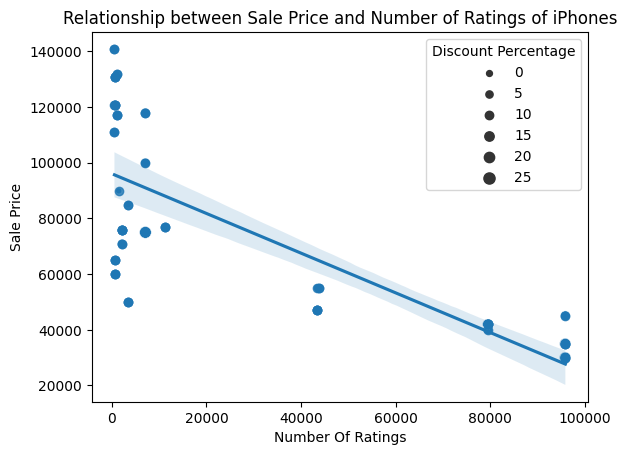

In [13]:
sns.scatterplot(data=df,x='Number Of Ratings',y='Sale Price',size='Discount Percentage')
sns.regplot(data=df,x='Number Of Ratings',y='Sale Price')
plt.title('Relationship between Sale Price and Number of Ratings of iPhones')
plt.show()

There is a negative linear relationship between the sale price of iPhones and the number of ratings. It means iPhones with lower sale prices are sold more in India. Now let’s have a look at the relationship between the discount percentage on iPhones on Flipkart and the number of ratings:

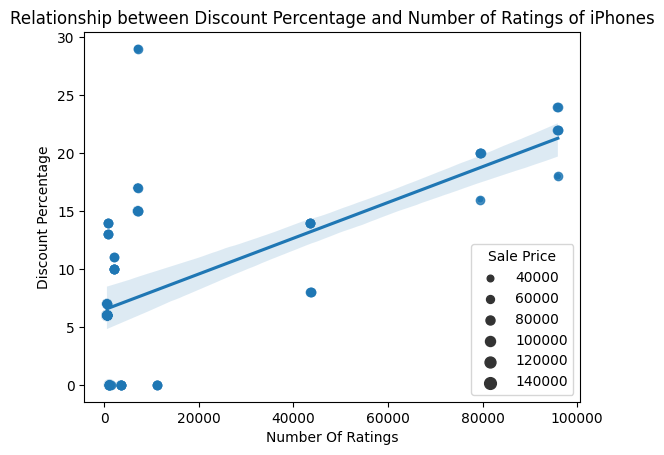

In [14]:
sns.scatterplot(data=df,x='Number Of Ratings',y='Discount Percentage',size='Sale Price')
sns.regplot(data=df,x='Number Of Ratings',y='Discount Percentage')
plt.title('Relationship between Discount Percentage and Number of Ratings of iPhones')
plt.show()

There is a linear relationship between the discount percentage on iPhones on Flipkart and the number of ratings. It means iPhones with high discounts are sold more in India.



Summary:

So this is how you can analyze the sales of iPhones in India using the Python programming language. Some of the takeaways from this article about the sales of iPhone in India are:

1. APPLE iPhone 8 Plus (Gold, 64 GB) was the most appreciated iPhone in India
2. iPhones with lower sale prices are sold more in India
3. iPhones with high discounts are sold more in India